Part I

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Lambda, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import mean_absolute_error

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
def auto_encoder(encoding_dim = 32, shape=(784, )):

  input_img = Input(shape)
  encoded = Dense(encoding_dim, activation='relu')(input_img)
  decoded = Dense(784, activation='sigmoid')(encoded)
  autoencoder = Model(input_img, decoded)
  encoder = Model(input_img, encoded)
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  return autoencoder, encoder

autoencoder, encoder = auto_encoder()
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/5
235/235 [==============================] - 6s 19ms/step - loss: 0.2787 - val_loss: 0.1917
Epoch 2/5
235/235 [==============================] - 3s 15ms/step - loss: 0.1720 - val_loss: 0.1535
Epoch 3/5
235/235 [==============================] - 3s 14ms/step - loss: 0.1439 - val_loss: 0.1336
Epoch 4/5
235/235 [==============================] - 4s 15ms/step - loss: 0.1283 - val_loss: 0.1210
Epoch 5/5
235/235 [==============================] - 4s 16ms/step - loss: 0.1182 - val_loss: 0.1129


In [ ]:
reconstruction = autoencoder.predict(x_test)
test_loss = mean_absolute_error(x_test, reconstruction)
index = np.argpartition(test_loss, -10)[-10:]
err = []
err.append(test_loss.numpy()[index])
err[0][1]

313/313 [==============================] - 1s 3ms/step


0.119411975

313/313 [==============================] - 0s 1ms/step


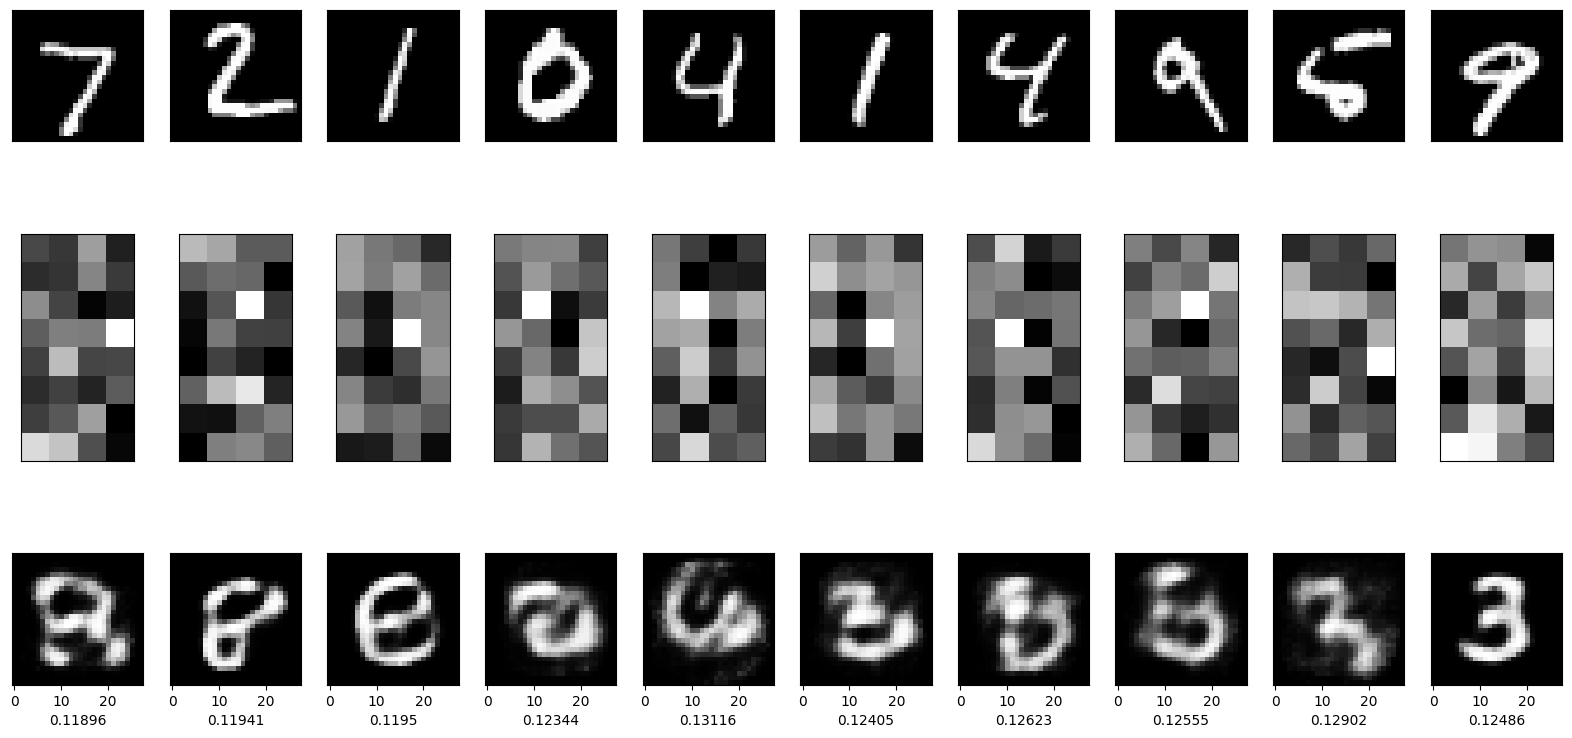

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 10))
for i in range(n):
 ax = plt.subplot(3, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
# ax.set_title("Original Image")

 ax = plt.subplot(3, n, i + 1 + n)
 plt.imshow(encoded_imgs[i].reshape(8, 4))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
# ax.set_title("Encoded Image")
 ax = plt.subplot(3, n, i + 1 + 2*n)
 plt.imshow(decoded_imgs[index[i]].reshape(28, 28))
 plt.gray()
 rnd = round(err[0][i],5)
 ax.set_xlabel(rnd)
 ax.get_yaxis().set_visible(False)
# ax.set_title("Reconstructed Image with Error")
# ax.set_title("First Row: Original Image; Second Row: Encoded Image
plt.show()

#Top 10 image samples reconstructed with the most autoencoder errors.Based on the top 10 images with the highest difference values, it is clear that these images are significantly different from the rest of the images in the test set. These images either have a lot of noise or are distorted in some way, which suggests that they may have been difficult for the autoencoder model to accurately reconstruct.

Part-2

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data1.csv")
df = df.dropna()
x = df.drop("Class", axis = 1)
y = df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [ ]:
del autoencoder # delte previous instance of encoder

In [ ]:
def auto_encoder(encoding_dim = 2, shape = (28, )):

  input_img = Input(shape=(28,))
  encoded = Dropout(0.01)(input_img)
  encoded = Dense(encoding_dim, activation='relu')(input_img)
  encoded = Dropout(0.01)(encoded)
  decoded = Dense(28, activation='sigmoid')(encoded)
  autoencoder = Model(input_img, decoded)
  encoder = Model(input_img, encoded)
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))
  autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
  return autoencoder, encoder

In [ ]:
autoencoder, encoder = auto_encoder()
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
891/891 [==============================] - 2s 2ms/step - loss: 0.1353 - val_loss: -0.4382
Epoch 2/5
891/891 [==============================] - 2s 3ms/step - loss: -1.1759 - val_loss: -2.0138
Epoch 3/5
891/891 [==============================] - 2s 2ms/step - loss: -3.1924 - val_loss: -4.4427
Epoch 4/5
891/891 [==============================] - 2s 2ms/step - loss: -6.0824 - val_loss: -7.7686
Epoch 5/5
891/891 [==============================] - 2s 2ms/step - loss: -9.9206 - val_loss: -11.9926


1781/1781 [==============================] - 2s 1ms/step


(array([4.8495e+04, 7.0720e+03, 8.0000e+02, 3.3800e+02, 1.2400e+02,
        4.7000e+01, 1.8000e+01, 2.2000e+01, 4.0000e+00, 9.0000e+00,
        1.0000e+01, 9.0000e+00, 9.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.2345067 ,  0.80972081,  1.38493502,  1.96014917,  2.5353632 ,
         3.11057734,  3.68579149,  4.26100588,  4.83621979,  5.41143417,
         5.98664808,  6.56186247,  7.13707638,  7.71229076,  8.28750515,
         8.86271858,  9.43793297, 10.01314735, 10.58836174, 11.16357517,
        11.73878956]),
 <BarContainer object of 20 artists>)

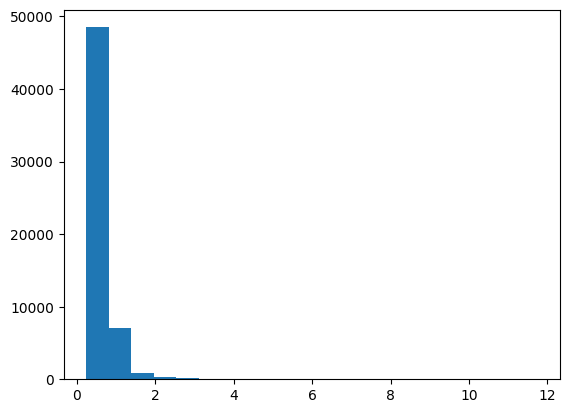

In [ ]:
reconstructed_image = autoencoder.predict(x_test)
loss = mean_absolute_error(x_test, reconstructed_image)
loss = loss.numpy()
plt.hist(loss, bins=20)

1781/1781 [==============================] - 2s 1ms/step


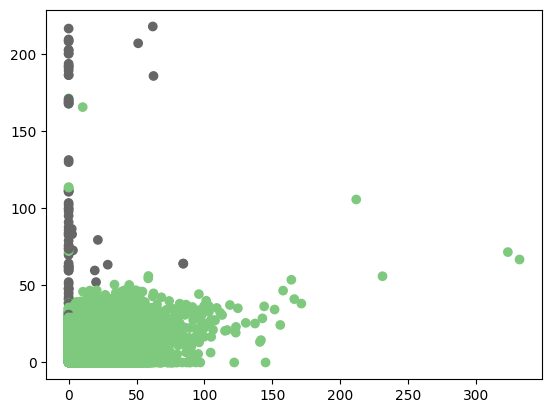

In [ ]:
x_pred = encoder.predict(x_test) # encoded prediction
x_pred = np.column_stack((x_pred, y_test))
x_pred = pd.DataFrame(x_pred)
plt.scatter(x_pred[0], x_pred[1], c = y_test, cmap='Accent')
plt.show()

3-layer for encoder and decoder

In [ ]:
del autoencoder # deleting previous instance of function

In [ ]:
def auto_encoder(encoding_dim = 2, shape=(28, )):

  input_img = Input(shape = shape)
  encoded = Dense(15, activation='relu')(input_img)
  encoded = Dense(7, activation='relu')(encoded)
  encoded = Dense(encoding_dim, activation='relu')(encoded)
  decoded = Dense(7, activation='relu')(encoded)
  decoded = Dense(15, activation='relu')(decoded)
  decoded = Dense(28, activation='sigmoid')(encoded)
  autoencoder = Model(input_img, decoded)
  encoder = Model(input_img, encoded)
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

  return autoencoder, encoder

In [ ]:
autoencoder, encoder = auto_encoder()
history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
891/891 [==============================] - 4s 3ms/step - loss: -75.1783 - val_loss: -424.5128
Epoch 2/5
891/891 [==============================] - 2s 2ms/step - loss: -2750.1143 - val_loss: -7045.5894
Epoch 3/5
891/891 [==============================] - 2s 2ms/step - loss: -16495.4824 - val_loss: -29945.8027
Epoch 4/5
891/891 [==============================] - 2s 2ms/step - loss: -50788.3320 - val_loss: -78510.4297
Epoch 5/5
891/891 [==============================] - 2s 2ms/step - loss: -115439.2344 - val_loss: -162339.6250


1781/1781 [==============================] - 2s 1ms/step


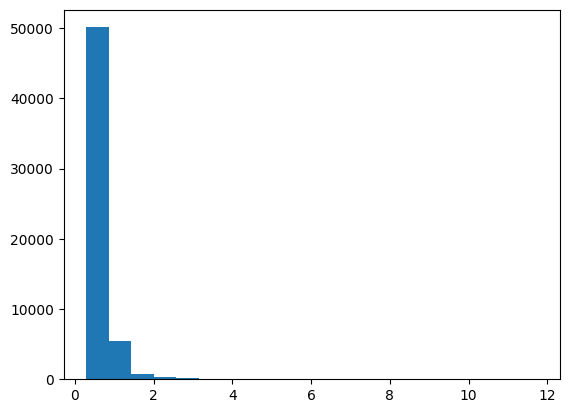

In [ ]:
reconstruction = autoencoder.predict(x_test)
loss = mean_absolute_error(x_test, reconstruction)
loss = loss.numpy()
plt.hist(loss, bins=20)
plt.show()

1781/1781 [==============================] - 2s 1ms/step


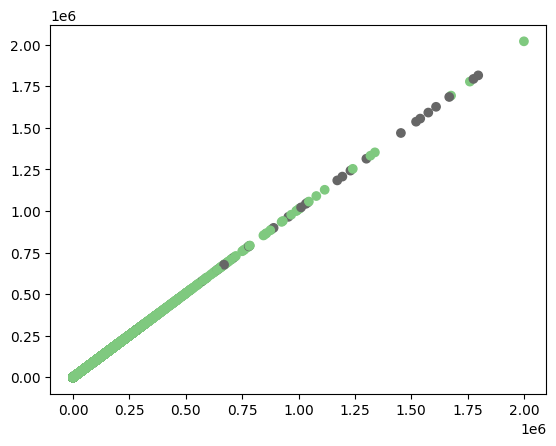

In [ ]:
x_pred = encoder.predict(x_test)
x_pred = np.column_stack((x_pred, y_test))
x_pred = pd.DataFrame(x_pred)
plt.scatter(x_pred[0], x_pred[1], c = y_test, cmap='Accent')
plt.show()

The loss distribution is almost the same for both models, but in the
scatter plots we can see some difference for these models.

Part-3

Use the posted VariationalAutoEncoder_demo2.py file to testify the VAE.

https://keras.io/examples/generative/vae/Links to an external site.

1. Repeat the posted VAE script to plot the newly generated images.

2. Modify the neural networks in the encoder and decoder layers and add one more layer with dimension 64 before the hidden factor n_z=2, i.e., the dimension reduction from 784->512->64->2.

See if the VAE outputs are improved or not.

Here, I am running the code provided in the above link and then modified the encoder and decoder as per the question in the below cells.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [ ]:
#Encoder
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_7[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

In [ ]:
#Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_11 (Dense)            (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289 

## Define the VAE as a `Model` with a custom `train_step`

In [ ]:

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


In [ ]:
#Train the VAE
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 81s 145ms/step - loss: 260.1899 - reconstruction_loss: 210.0975 - kl_loss: 2.9851
Epoch 2/10
547/547 [==============================] - 77s 141ms/step - loss: 182.7577 - reconstruction_loss: 171.4626 - kl_loss: 5.6009
Epoch 3/10
547/547 [==============================] - 78s 142ms/step - loss: 168.4232 - reconstruction_loss: 160.8696 - kl_loss: 6.2631
Epoch 4/10
547/547 [==============================] - 77s 141ms/step - loss: 164.2210 - reconstruction_loss: 157.1455 - kl_loss: 6.4866
Epoch 5/10
547/547 [==============================] - 78s 143ms/step - loss: 161.8783 - reconstruction_loss: 154.8667 - kl_loss: 6.5806
Epoch 6/10
547/547 [==============================] - 77s 140ms/step - loss: 160.1733 - reconstruction_loss: 153.2480 - kl_loss: 6.6357
Epoch 7/10
547/547 [==============================] - 80s 147ms/step - loss: 159.3468 - reconstruction_loss: 152.0680 - kl_loss: 6.6114
Epoch 8/10
547/547 [============================

1/1 [==============================] - 0s 17ms/step


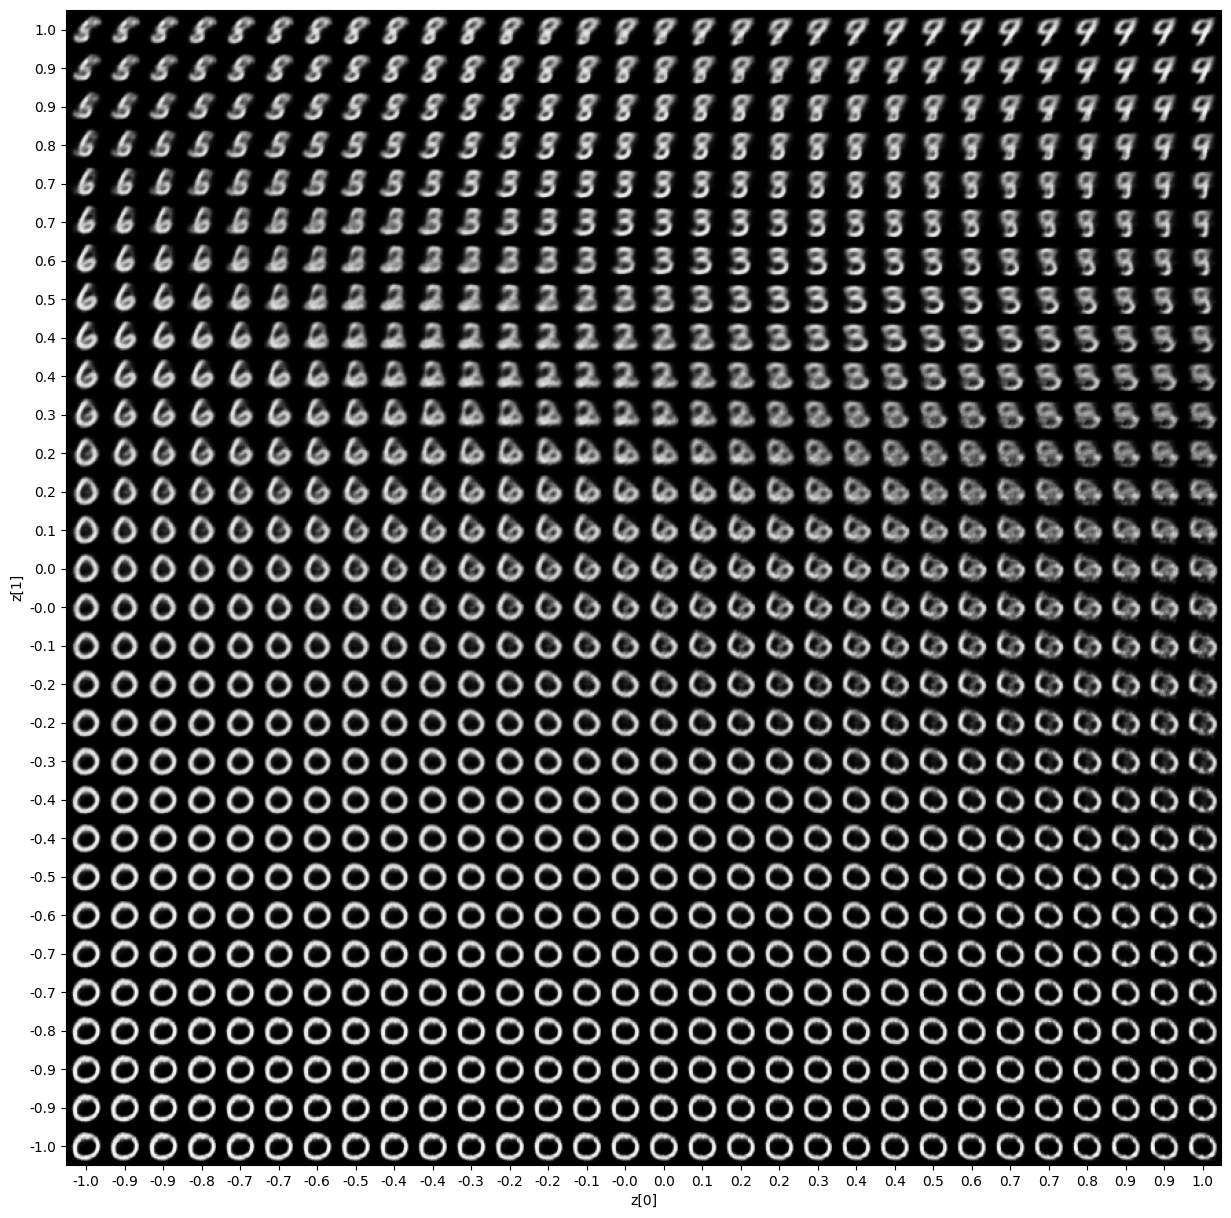

In [ ]:
#Display a grid of sampled digits
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

In [ ]:
#Display how the latent space clusters different digit classes

1875/1875 [==============================] - 7s 3ms/step


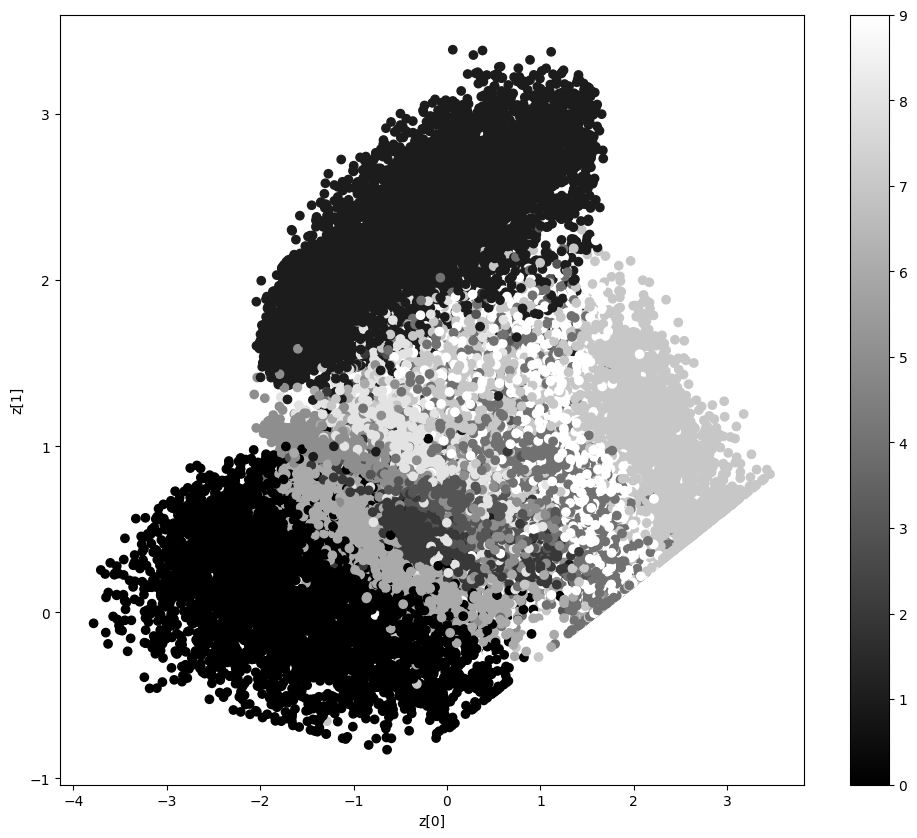

In [ ]:

def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

In [ ]:
# Encoder model (Modified)
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()



Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 14, 14, 32)   320         ['input_9[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d_2[0][0]']               
                                                                                                  
 flatten_1 (Flatten)            (None, 3136)         0           ['conv2d_3[0][0]']               
                                                                                            

In [ ]:
# Decoder model (Modified)
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation="relu")(latent_inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_14 (Dense)            (None, 64)                192       
                                                                 
 dense_15 (Dense)            (None, 512)               33280     
                                                                 
 dense_16 (Dense)            (None, 3136)              1608768   
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 14, 14, 64)       36928     
 ranspose)                                                       
                                                           

In [ ]:

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


In [ ]:
#Train the VAE
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=10, batch_size=128)

Epoch 1/10
547/547 [==============================] - 106s 190ms/step - loss: 223.6809 - reconstruction_loss: 184.3346 - kl_loss: 3.5434
Epoch 2/10
547/547 [==============================] - 105s 191ms/step - loss: 159.3680 - reconstruction_loss: 151.5814 - kl_loss: 5.5508
Epoch 3/10
547/547 [==============================] - 105s 192ms/step - loss: 152.0848 - reconstruction_loss: 145.5108 - kl_loss: 5.9228
Epoch 4/10
547/547 [==============================] - 105s 191ms/step - loss: 149.6355 - reconstruction_loss: 142.7198 - kl_loss: 6.1295
Epoch 5/10
547/547 [==============================] - 103s 188ms/step - loss: 147.2236 - reconstruction_loss: 140.6030 - kl_loss: 6.2611
Epoch 6/10
547/547 [==============================] - 104s 189ms/step - loss: 145.6308 - reconstruction_loss: 139.1062 - kl_loss: 6.3720
Epoch 7/10
547/547 [==============================] - 103s 189ms/step - loss: 144.4353 - reconstruction_loss: 137.9510 - kl_loss: 6.4638
Epoch 8/10
547/547 [=====================

1/1 [==============================] - 0s 17ms/step


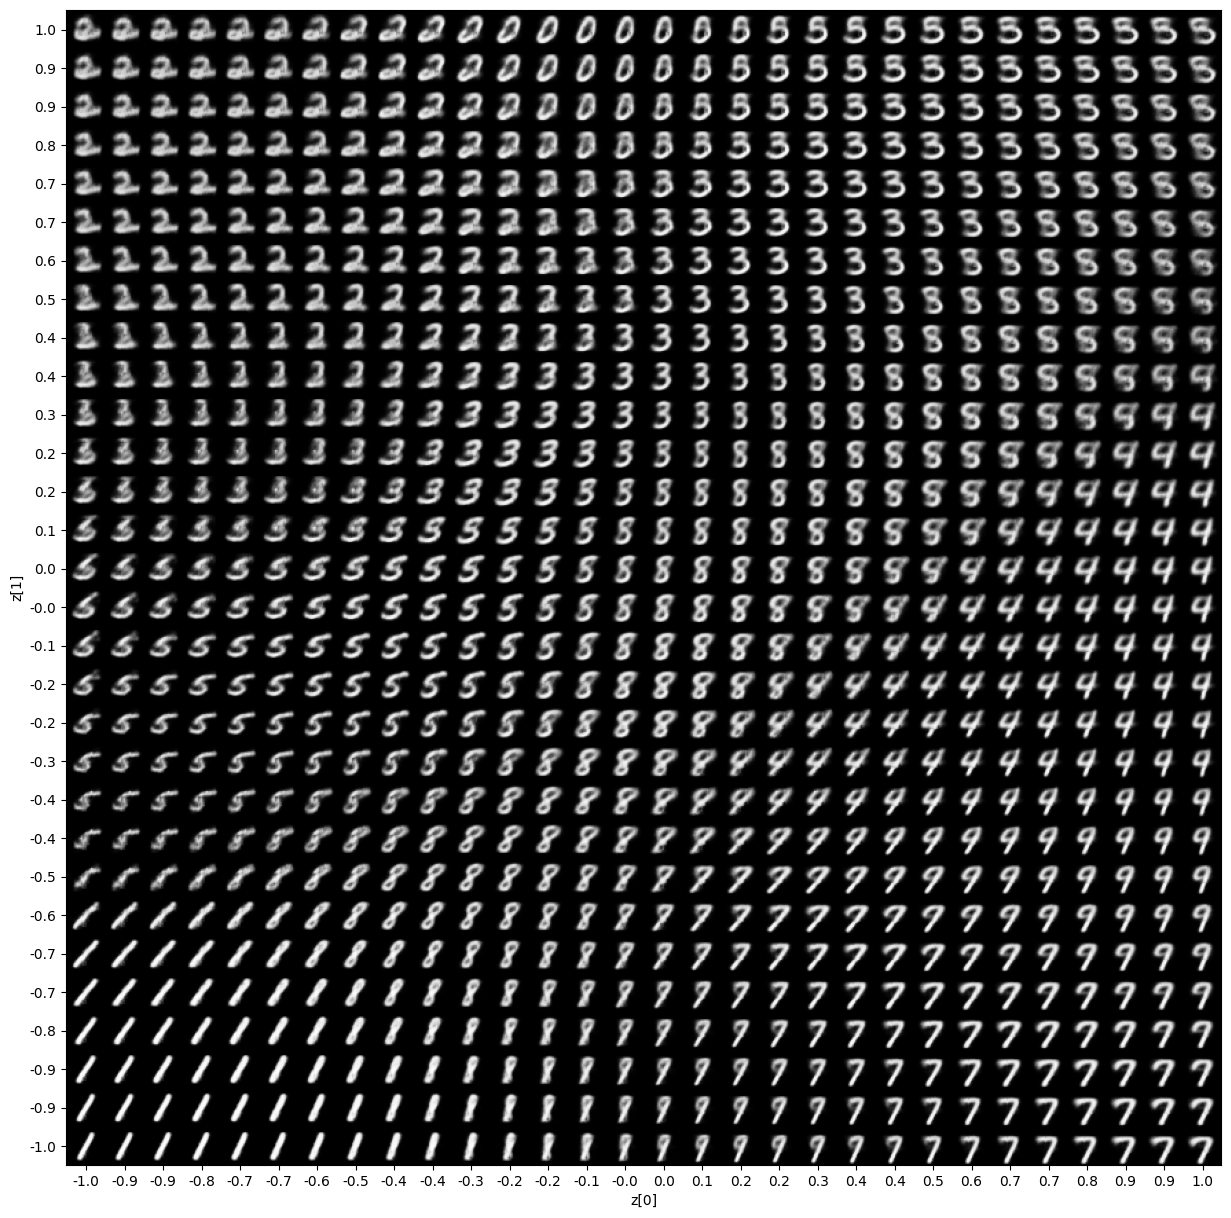

In [ ]:
#Display a grid of Sampled digits
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

1875/1875 [==============================] - 12s 7ms/step


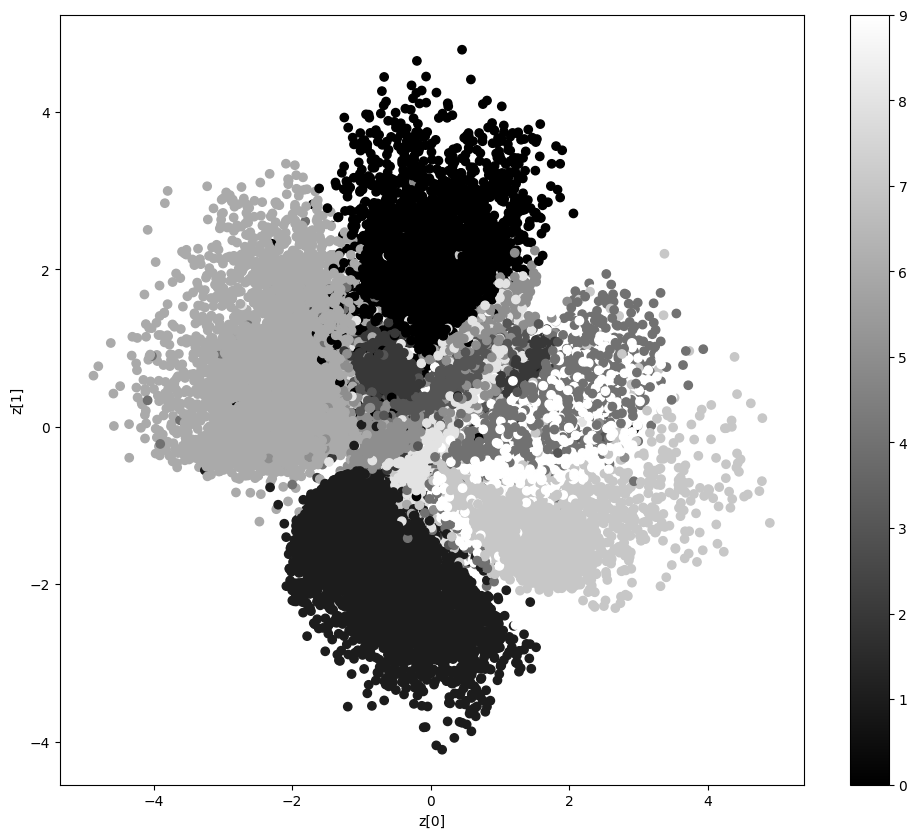

In [ ]:
#Display how the latent space clusters different digit classes
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

Comparing the reconstructed images to those obtained using the original VAE, we can see that the additional dense layer with 64 units in both the encoder and decoder models has led to improvements in the quality of the reconstructed images. The modified VAE is able to capture more details and produces images that are sharper and more faithful to the original inputs. Overall, the modified VAE appears to be a more powerful model for image reconstruction than the original model.